<a href="https://colab.research.google.com/github/Sigerip/curso-data-viz/blob/main/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Matplotlib

MATPLOLIB é uma biblioteca de software para criação de gráficos e visualizações de dados em geral, feita para e da linguagem de programação Python e sua extensão de matemática NumPy.

Originalmente criada pelo biólogo e neurocientista americano John D. Hunter, a biblioteca hoje possui uma comunidade ativa atuando em seu desenvolvimento e é distibuída sob uma licença BSD. O programador Michael Droetboom foi nomeado o líder do projeto um pouco antes da morte do criador John Hunter em agosto de 2012, e logo o cientista Thomas Caswell se juntou a ele.

Oferece uma interface de programação orientada a objetos para incluir gráficos em aplicações usando toolkits de interface gráfica, como Tkinter, WxPython, Qt ou GTK.

SciPy faz uso do Matplotlib.

Matplotlib 2.0.x suporta Python nas versões 2.7 até 3.6. O suporte ao Python 3 começou com o Matplotlib 1.2, e o Matplotlib 1.4 foi o último a suportar o Python 2.6. O projeto se comprometeu a não dar mais suporte ao Python 2 a partir de 2020, assinando o Python 3 statement.

## 3.1 Anatomia de um Gráfico Matplotlib

Antes de começarmos a criar gráficos, é importante entender a estrutura de um gráfico Matplotlib:

- Figure: O contêiner de nível superior que pode conter múltiplos eixos (plots)
    
- Axes: O espaço onde os dados são plotados

- Axis: As linhas que delimitam os limites do gráfico (eixos x e y)
    
- Artist: Tudo o que você vê no gráfico (linhas, textos, legendas, etc.)

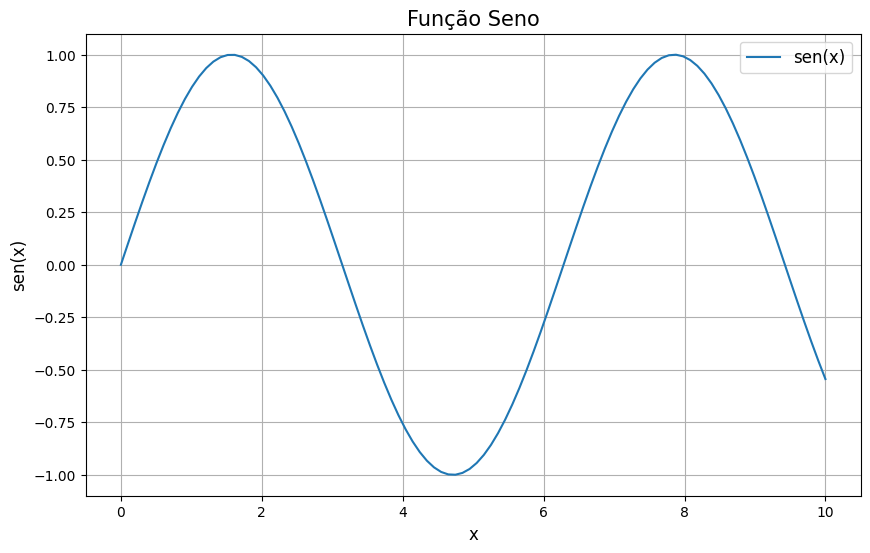

In [1]:
# Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Criar uma figura e um conjunto de eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Gerar dados
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Plotar dados
ax.plot(x, y, label='sen(x)')

# Adicionar elementos ao gráfico
ax.set_title('Função Seno', fontsize=15)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('sen(x)', fontsize=12)
ax.legend(fontsize=12)
ax.grid(True)

plt.show()

## 3.2 Tipos Básicos de Gráficos

Matplotlib suporta uma grande variedade de tipos de gráficos. Vamos explorar os mais comuns:

### 3.2.1 Gráfico de Linhas

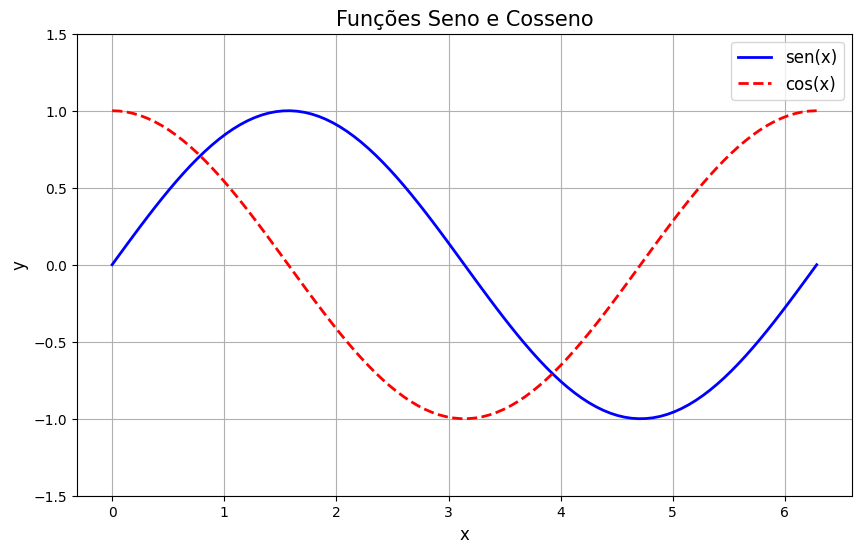

In [2]:
# Dados
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Criar gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y1, label='sen(x)', color='blue', linewidth=2)
ax.plot(x, y2, label='cos(x)', color='red', linewidth=2, linestyle='--')

# Personalizar gráfico
ax.set_title('Funções Seno e Cosseno', fontsize=15)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.legend(fontsize=12)
ax.grid(True)
ax.set_ylim(-1.5, 1.5)

plt.show()

### 3.2.2 Gráfico de Dispersão (Scatter)

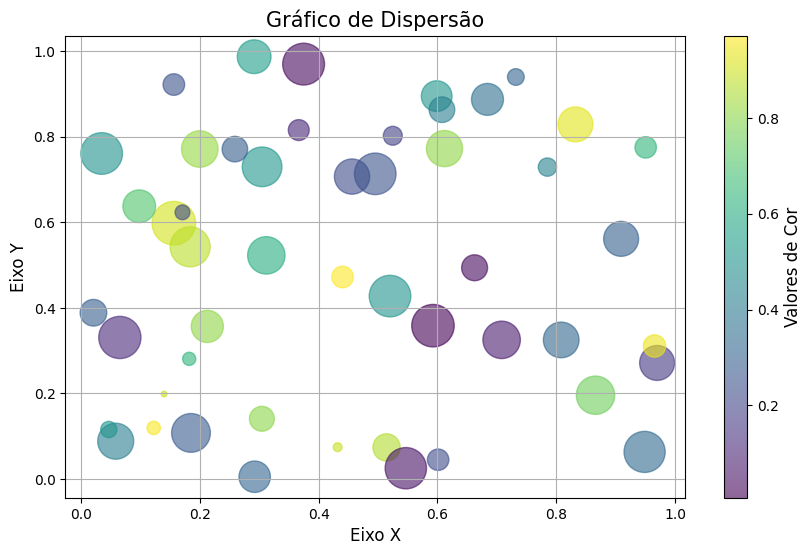

In [3]:
# Dados
np.random.seed(42)
x = np.random.rand(50)
y = np.random.rand(50)
colors = np.random.rand(50)
sizes = 1000 * np.random.rand(50)

# Criar gráfico
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(x, y, c=colors, s=sizes, alpha=0.6, cmap='viridis')

# Personalizar gráfico
ax.set_title('Gráfico de Dispersão', fontsize=15)
ax.set_xlabel('Eixo X', fontsize=12)
ax.set_ylabel('Eixo Y', fontsize=12)
ax.grid(True)

# Adicionar barra de cores
cbar = plt.colorbar(scatter)
cbar.set_label('Valores de Cor', fontsize=12)

plt.show()

### 3.2.3 Gráfico de Barras

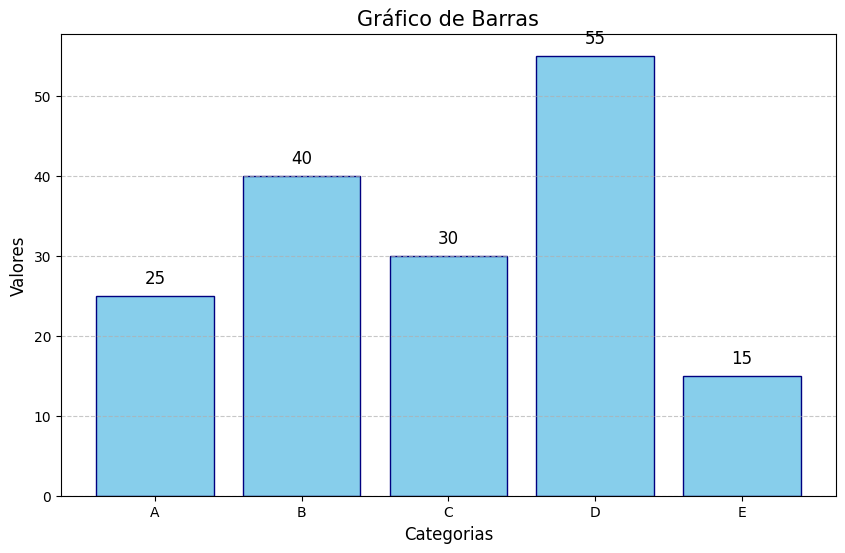

In [4]:
# Dados
categorias = ['A', 'B', 'C', 'D', 'E']
valores = [25, 40, 30, 55, 15]

# Criar gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(categorias, valores, color='skyblue', edgecolor='navy')

# Personalizar gráfico
ax.set_title('Gráfico de Barras', fontsize=15)
ax.set_xlabel('Categorias', fontsize=12)
ax.set_ylabel('Valores', fontsize=12)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adicionar valores acima das barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height}', ha='center', va='bottom', fontsize=12)

plt.show()

### 3.2.4 Histograma

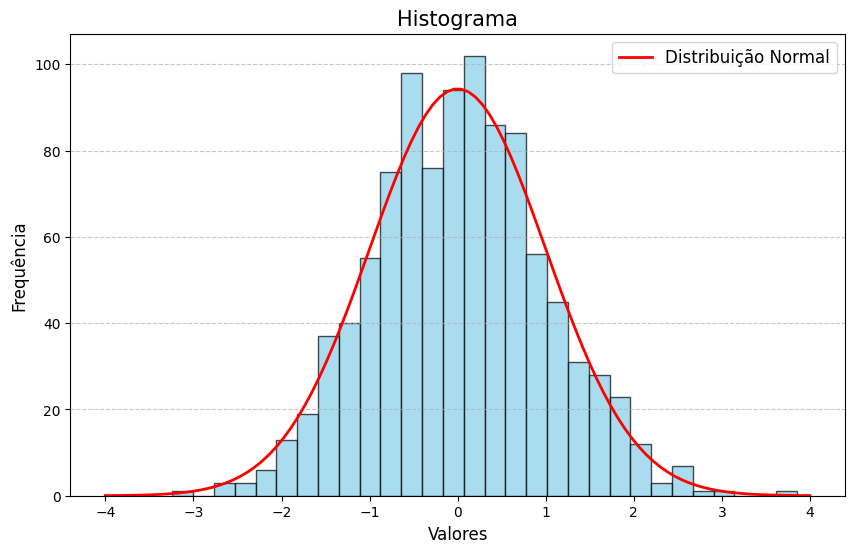

In [5]:
# Dados
np.random.seed(42)
data = np.random.normal(0, 1, 1000)  # Distribuição normal

# Criar gráfico
fig, ax = plt.subplots(figsize=(10, 6))
n, bins, patches = ax.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Personalizar gráfico
ax.set_title('Histograma', fontsize=15)
ax.set_xlabel('Valores', fontsize=12)
ax.set_ylabel('Frequência', fontsize=12)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adicionar linha de densidade
from scipy import stats
x = np.linspace(-4, 4, 100)
y = stats.norm.pdf(x, 0, 1) * len(data) * (bins[1] - bins[0])
ax.plot(x, y, 'r-', linewidth=2, label='Distribuição Normal')
ax.legend(fontsize=12)

plt.show()

### 3.2.5 Gráfico de Pizza

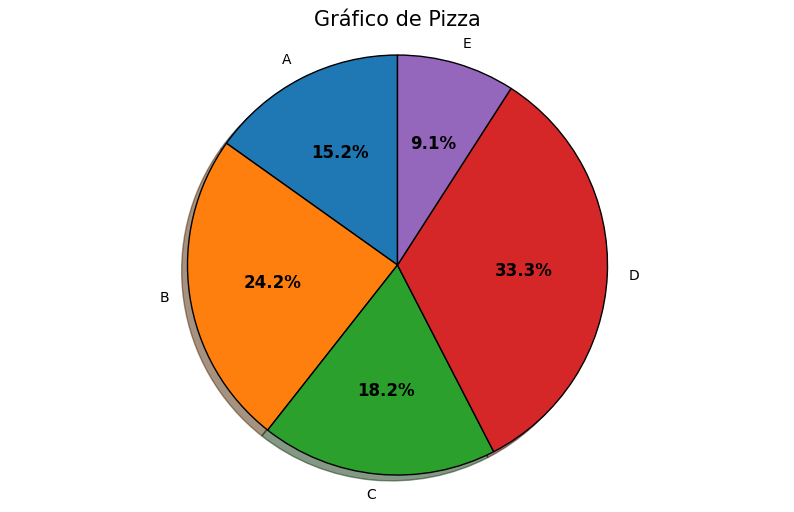

In [6]:
# Dados
categorias = ['A', 'B', 'C', 'D', 'E']
valores = [25, 40, 30, 55, 15]

# Criar gráfico
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(valores, labels=categorias, autopct='%1.1f%%',
                                  startangle=90, shadow=True,
                                  wedgeprops={'edgecolor': 'black'})

# Personalizar gráfico
ax.set_title('Gráfico de Pizza', fontsize=15)
plt.setp(autotexts, size=12, weight='bold')
ax.axis('equal')  # Garante que o gráfico seja circular

plt.show()

### 3.2.6 Subplots: Múltiplos Gráficos

Matplotlib permite criar múltiplos gráficos em uma única figura:

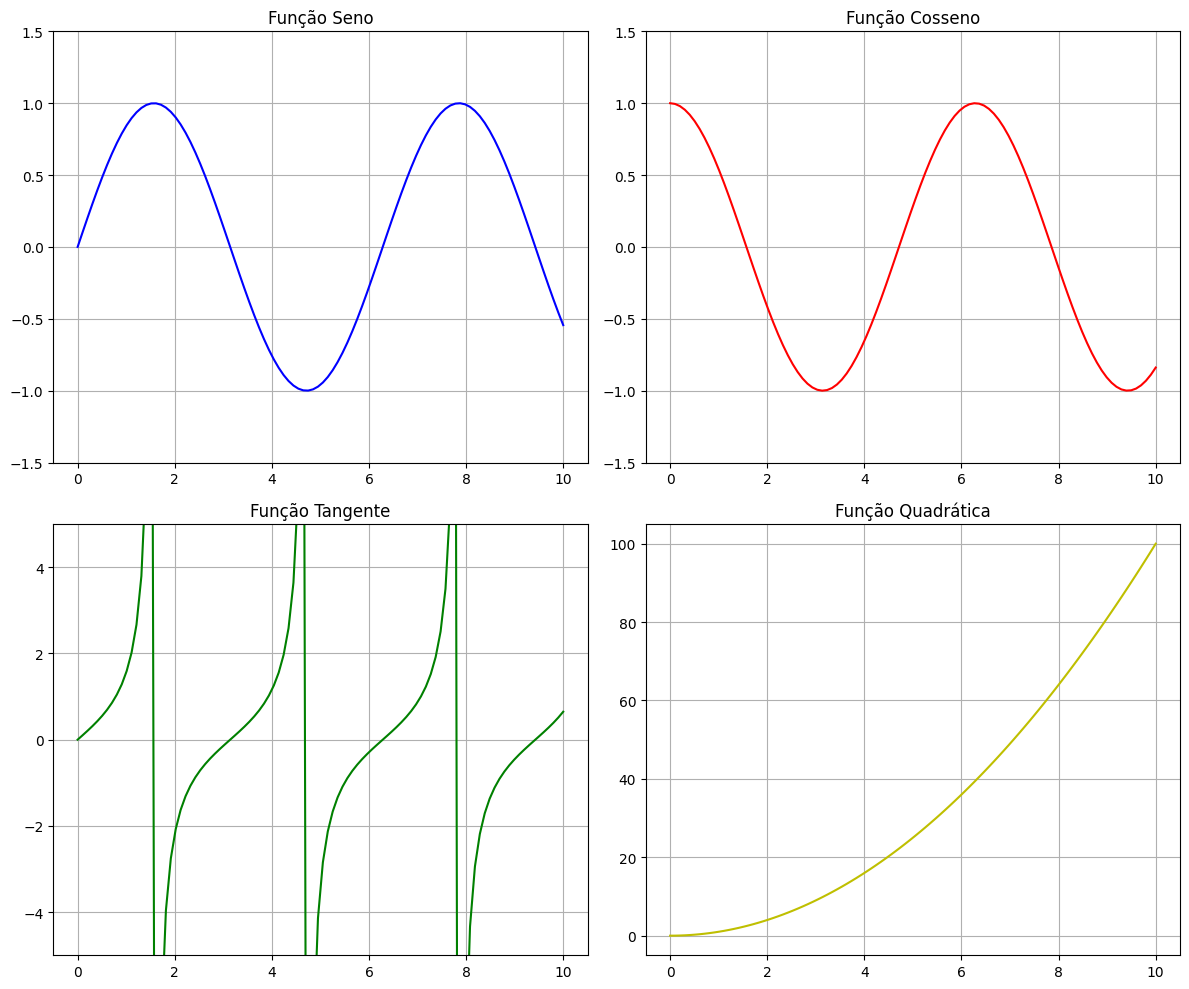

In [7]:
# Dados
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
y4 = x**2

# Criar figura com subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico 1: Seno
axs[0, 0].plot(x, y1, 'b-')
axs[0, 0].set_title('Função Seno')
axs[0, 0].set_ylim(-1.5, 1.5)
axs[0, 0].grid(True)

# Gráfico 2: Cosseno
axs[0, 1].plot(x, y2, 'r-')
axs[0, 1].set_title('Função Cosseno')
axs[0, 1].set_ylim(-1.5, 1.5)
axs[0, 1].grid(True)

# Gráfico 3: Tangente
axs[1, 0].plot(x, y3, 'g-')
axs[1, 0].set_title('Função Tangente')
axs[1, 0].set_ylim(-5, 5)
axs[1, 0].grid(True)

# Gráfico 4: Quadrática
axs[1, 1].plot(x, y4, 'y-')
axs[1, 1].set_title('Função Quadrática')
axs[1, 1].grid(True)

# Ajustar layout
plt.tight_layout()
plt.show()

### 3.2.7 Personalização de Gráficos

Matplotlib oferece amplas opções de personalização:

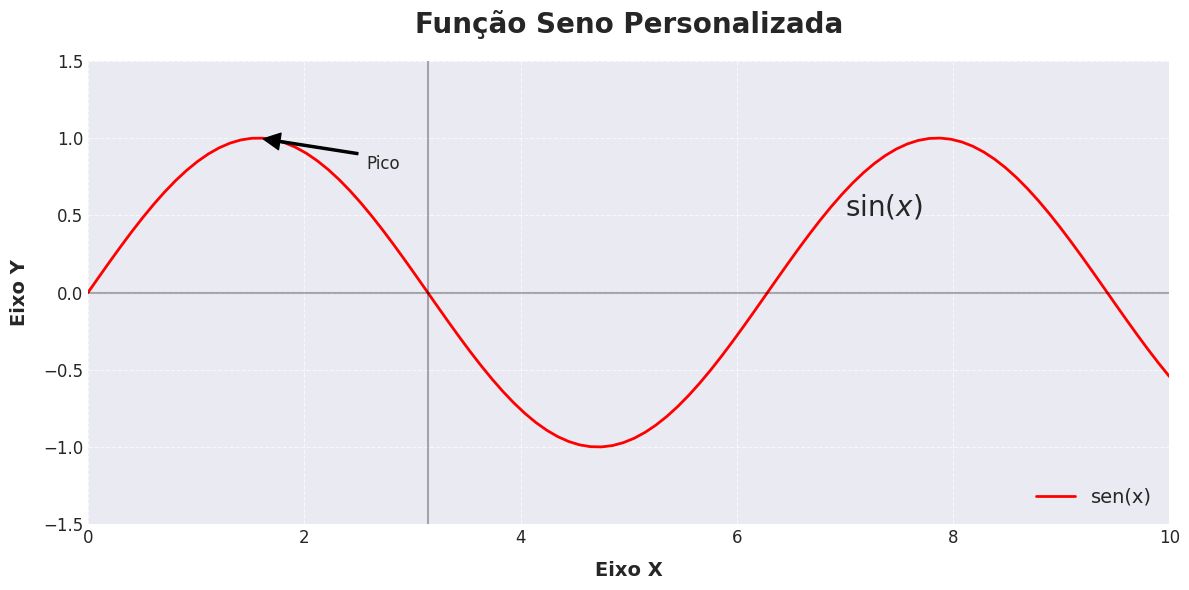

In [8]:
# Dados
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Criar gráfico com estilo personalizado
plt.figure(figsize=(12, 6))

# Definir estilo
plt.style.use('seaborn-v0_8-darkgrid')

# Plotar dados
plt.plot(x, y, 'r-', linewidth=2, label='sen(x)')

# Personalizar título e rótulos
plt.title('Função Seno Personalizada', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Eixo X', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Eixo Y', fontsize=14, fontweight='bold', labelpad=10)

# Personalizar eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Adicionar anotações
plt.annotate('Pico', xy=(np.pi/2, 1), xytext=(np.pi/2 + 1, 0.8),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=12)

# Adicionar legenda
plt.legend(fontsize=14, loc='lower right')

# Adicionar texto
plt.text(7, 0.5, r'$\sin(x)$', fontsize=20)

# Adicionar linhas de referência
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=np.pi, color='k', linestyle='-', alpha=0.3)

# Limitar eixos
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()

### 3.2.8 Salvando Gráficos

Matplotlib permite salvar gráficos em vários formatos:

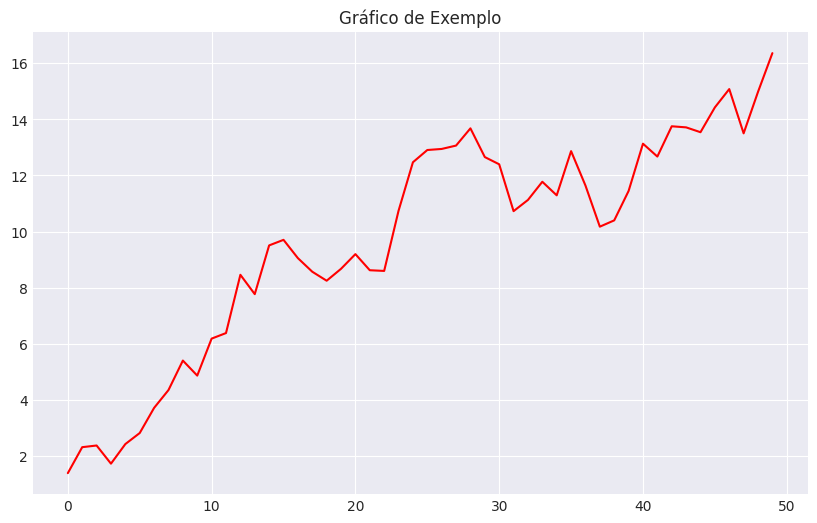

In [9]:
# Criar um gráfico simples
plt.figure(figsize=(10, 6))
plt.plot(np.random.randn(50).cumsum(), 'r-')
plt.title('Gráfico de Exemplo')
plt.grid(True)

# Salvar em diferentes formatos
plt.savefig('grafico.png', dpi=300, bbox_inches='tight')  # PNG
plt.savefig('grafico.pdf', bbox_inches='tight')  # PDF
plt.savefig('grafico.svg', bbox_inches='tight')  # SVG
plt.savefig('grafico.jpg', dpi=300, bbox_inches='tight')  # JPG

plt.show()

## 3.3 Conclusão

Matplotlib é uma biblioteca poderosa e flexível para visualização de dados em Python. Ela serve como base para bibliotecas mais especializadas como Seaborn, que exploraremos no próximo capítulo. Dominar os fundamentos do Matplotlib é essencial para criar visualizações eficazes e personalizadas.

No próximo capítulo, veremos como o Seaborn se baseia no Matplotlib para fornecer uma interface de alto nível para criar gráficos estatísticos atraentes com menos código.